# Data Wrangling

Data wrangling is the process of `cleaning`, `transforming` and `organizing` data  so that it can be used for analysis and visualization. It is an important step in the data analysis process because raw data is often incomplete, inconsistant, and in an unstructured format, which can make it difficult to work with.
- Data wrangling helps to make the data more `consistent`, `understandable`, `accurate` and `usable` for analysis and decision making

## steps
1. Gathering data (kya clean krna)
2. Tools to clean data (kis se clean krna) libraries
3. How to do, (kisse clean karna (steps))

In [24]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df= sns.load_dataset('titanic')

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
df.isnull().sum()/len(df)* 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [30]:
df.drop(columns= 'deck', inplace= True)

In [31]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [32]:
df['age'] = df.age.fillna(df['age'].mean())


In [35]:
df.isnull().sum()/len(df)* 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [37]:
df['embarked'] = df.embarked.fillna(df['embarked'].mode()[0])

In [40]:
df['embark_town'] = df.embark_town.fillna(df['embark_town'].mode()[0])

In [41]:
df.isnull().sum()/len(df)* 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outlier Removal

# Visualization Method

<Axes: xlabel='sex', ylabel='age'>

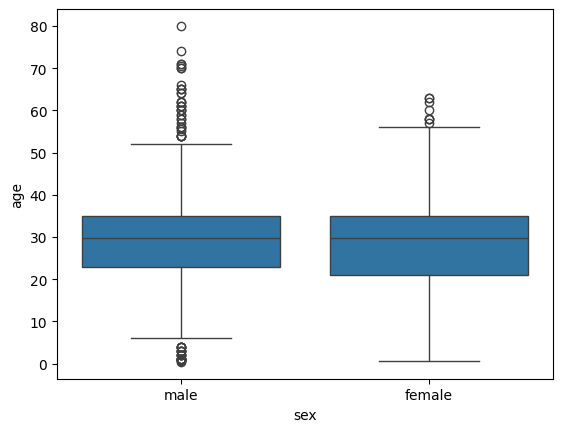

In [44]:
import seaborn as sns
sns.boxplot(data= df, y='age', x= 'sex')

13.0

In [46]:
# IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
IQR
lower_bound = Q1-1.5 * IQR
upper_bound = Q3+1.5 * IQR
df= df[(df['age']>lower_bound)&(df['age']< upper_bound)]  # Filtering the data

In [48]:
# IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
IQR
lower_bound = Q1-1.5 * IQR
upper_bound = Q3+1.5 * IQR
df= df[(df['fare']>lower_bound)&(df['fare']< upper_bound)] 

In [49]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

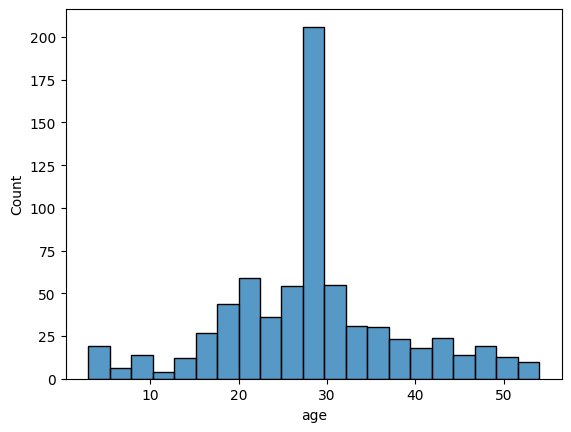

In [50]:
sns.histplot(x='age',data=df)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool